### Preparation

In [51]:
# Import modules
import torch
import torchvision
import torchvision.transforms as transforms

from sklearn.svm import SVC  # Support Vector Machine
from tqdm import tqdm

import time

### Prepare Dataset

In [47]:
# Set transforms
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, ), (0.5, ))]
                               )

print(transform)

Compose(
    ToTensor()
    Normalize(mean=(0.5,), std=(0.5,))
)


In [56]:
# Download dataset
train_dataset = torchvision.datasets.MNIST(root = './data/0627-MNIST',
                                           train = True,
                                           download = True,
                                           transform = transform)
test_dataset = torchvision.datasets.MNIST(root = './data/0627-MNIST',
                                          train = False,
                                          download = True,
                                          transform = transform)

# Set DataLoader
train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size = 1000,
                                           shuffle = True,
                                           num_workers = 2)
test_loader = torch.utils.data.DataLoader(test_dataset,
                                          batch_size = 1000,
                                          shuffle = False,
                                          num_workers = 2)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/0627-MNIST\MNIST\raw\train-images-idx3-ubyte.gz to ./data/0627-MNIST\MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/0627-MNIST\MNIST\raw\train-labels-idx1-ubyte.gz to ./data/0627-MNIST\MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/0627-MNIST\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data/0627-MNIST\MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/0627-MNIST\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data/0627-MNIST\MNIST\raw



### Extract Features

In [57]:

# Initialize features and labels
train_features = []
train_labels = []

# Get data into list
for i, data in enumerate(train_loader, 0):
    inputs, labels = data
    
    # Transform to 2D data
    inputs = inputs.view(inputs.shape[0], -1)
    
    # Save as lists
    train_features.append(inputs)
    train_labels.append(labels)

# Transform to Tensor format
train_features = torch.cat(train_features, dim = 0)
train_labels = torch.cat(train_labels, dim = 0)

print(train_features)
print(train_labels)

tensor([[-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        ...,
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.]])
tensor([1, 9, 1,  ..., 1, 1, 9])


In [58]:
# Initialize features and labels
test_features = []
test_labels = []

# Get data into list
for i, data in enumerate(test_loader, 0):
    inputs, labels = data
    
    # Transform to 2D data
    inputs = inputs.view(inputs.shape[0], -1)
    
    # Save as lists
    test_features.append(inputs)
    test_labels.append(labels)

# Transform to Tensor format
test_features = torch.cat(test_features, dim = 0)
test_labels = torch.cat(test_labels, dim = 0)

print(test_features)
print(test_labels)

tensor([[-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        ...,
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.]])
tensor([7, 2, 1,  ..., 4, 5, 6])


### Image Classification

SURPPORT VECTOR MACHINE MODEL TRAIN AND TEST
Accuracy:  0.9836
Training Time: 465.03 secs


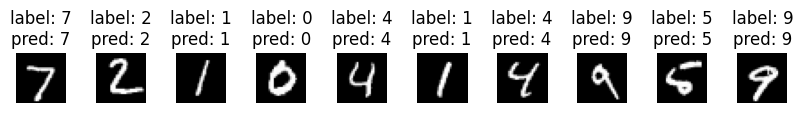

In [59]:
# Fit Model
print('SURPPORT VECTOR MACHINE MODEL TRAIN AND TEST')

# Set start time
start_time = time.time()

# Define a model
model = SVC(C = 1.0,
            kernel = 'rbf',
            gamma = 0.01)

# Fit the model
model.fit(train_features.numpy(),
          train_labels.numpy())

# Calcualte accuracy
acc = model.score(test_features.numpy(),
                  test_labels.numpy())

# Set end time
end_time = time.time()

# Get results
print('Accuracy: ', acc)

# Calculate trainning time
train_time = end_time - start_time
print('Training Time: {:.2f} secs'.format(train_time))

##############################

# Visualize predicted results
def plot_images(images, labels, preds):
    fig, axes = plt.subplots(1, 10, figsize=(10, 1))

    for i, ax in enumerate(axes):
        ax.imshow(images[i].reshape((28, 28)), cmap='gray')
        title = 'label: {}\npred: {}'.format(labels[i], preds[i])
        ax.set_title(title)
        ax.axis('off')
    plt.subplots_adjust(top=0.5, bottom=0, hspace=0, wspace=0.5)
    plt.show()

# Get test images
test_images, test_labels = next(iter(test_loader))
test_images = test_images.view(test_images.shape[0], -1)

# Predict models
test_preds = model.predict(test_images.numpy())

# Visualize results
plot_images(test_images.numpy(), test_labels.numpy(), test_preds)